In [9]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [10]:
import os
import re
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import glob
import math
import numpy as np
import pandas as pd
from bisect import *
from decimal import Decimal

    time     ncalls        memtot     memlive     maxlive
0     10     436813  5.578830e+08    42114230    42360014
1     20     649072  7.796060e+08    43057496    43292993
2     30    5329016  1.435560e+09    67448836   127885760
3     40    9539423  3.356880e+09   463125260   463125260
4     50   20302319  5.971210e+09   893124305   898108639
5     60   38210541  8.447390e+09  1143410541  1178764851
6     70   68298296  1.311900e+10  1243885713  1263236118
7     80  102332816  1.697610e+10  2172454088  2172455304
8     90  124693790  2.121220e+10  3170190690  3533684214
9    100  157164916  2.814320e+10  3744786409  3809620679
10   110  201851523  3.528320e+10  3768670756  3817221293
11   120  244843433  4.294120e+10  3752968058  3829126479
12   130  290356978  5.052540e+10  3830487924  3840598685
13   140  333515507  5.733530e+10  3832156315  3876406606
14   150  380132651  6.455810e+10  3858558624  3885410094
15   160  424811828  7.176050e+10  3845330603  3913032621
16   170  4721

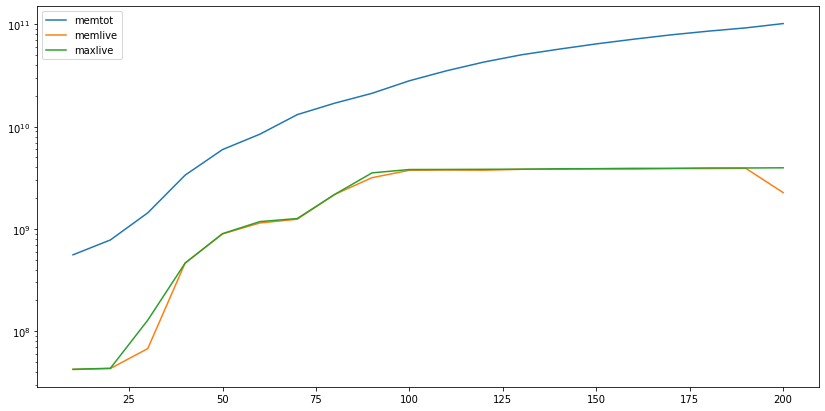

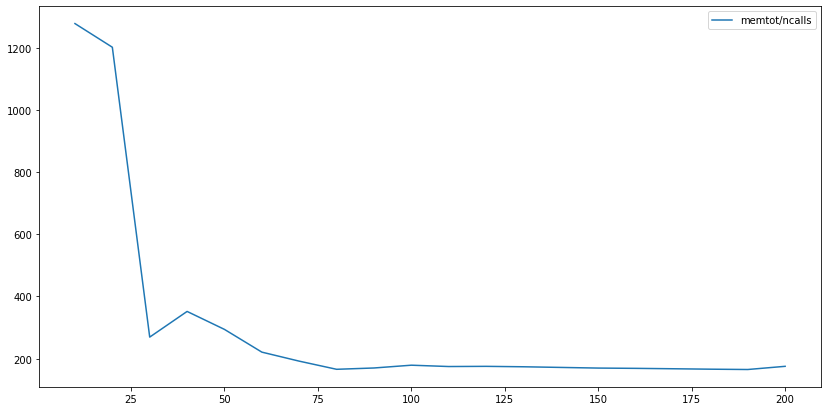

    time     ncalls       memtot      memlive      maxlive
0    NaN        NaN          NaN          NaN          NaN
1    1.0    21225.9   22172300.0      94326.6      93297.9
2    1.0   467994.4   65595400.0    2439134.0    8459276.7
3    1.0   421040.7  192132000.0   39567642.4   33523950.0
4    1.0  1076289.6  261433000.0   42999904.5   43498337.9
5    1.0  1790822.2  247618000.0   25028623.6   28065621.2
6    1.0  3008775.5  467161000.0   10047517.2    8447126.7
7    1.0  3403452.0  385710000.0   92856837.5   90921918.6
8    1.0  2236097.4  423610000.0   99773660.2  136122891.0
9    1.0  3247112.6  693100000.0   57459571.9   27593646.5
10   1.0  4468660.7  714000000.0    2388434.7     760061.4
11   1.0  4299191.0  765800000.0   -1570269.8    1190518.6
12   1.0  4551354.5  758420000.0    7751986.6    1147220.6
13   1.0  4315852.9  680990000.0     166839.1    3580792.1
14   1.0  4661714.4  722280000.0    2640230.9     900348.8
15   1.0  4467917.7  720240000.0   -1322802.1    2762252

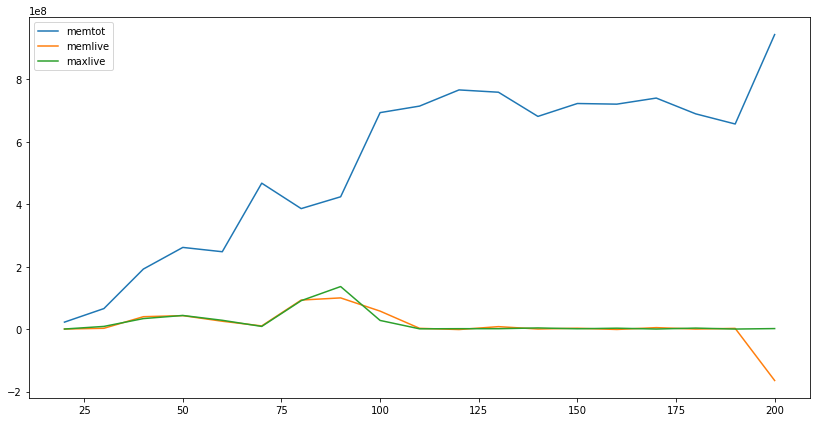

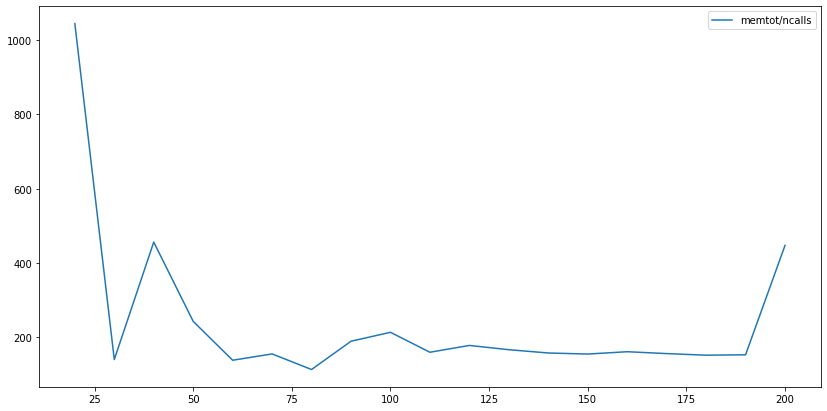

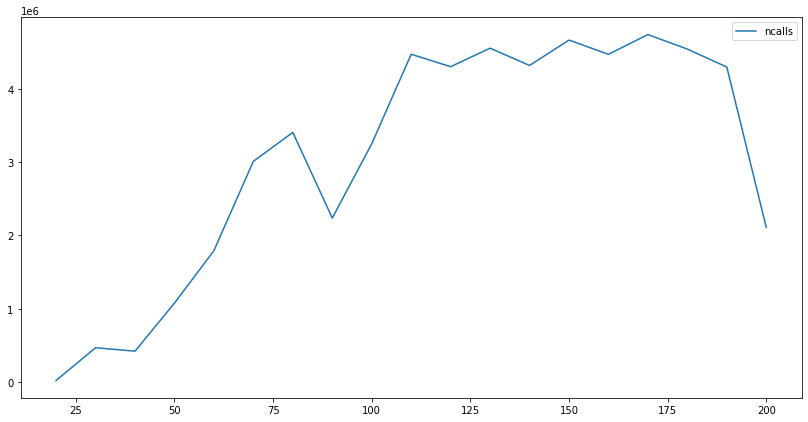

In [11]:
file = 'memstat.dat'
dat = pd.read_csv(file, delimiter=" ")
print(dat)
fig, ax = plt.subplots(figsize=(14, 7))
plt.plot(dat["time"],dat['memtot'],label="memtot")
plt.plot(dat["time"],dat['memlive'],label="memlive")
plt.plot(dat["time"],dat['maxlive'],label="maxlive")
plt.yscale("log")
plt.legend(loc='upper left')
plt.show()
fig, ax = plt.subplots(figsize=(14, 7))
plt.plot(dat["time"],dat['memtot']/dat['ncalls'],label="memtot/ncalls")
plt.legend(loc='upper right')
plt.show()

df = 0.1*dat.diff()
print(df)
fig, ax = plt.subplots(figsize=(14, 7))
plt.plot(dat["time"],df['memtot'],label="memtot")
plt.plot(dat["time"],df['memlive'],label="memlive")
plt.plot(dat["time"],df['maxlive'],label="maxlive")
#plt.yscale("log")
plt.legend(loc='upper left')
plt.show()
fig, ax = plt.subplots(figsize=(14, 7))
plt.plot(dat["time"],df['memtot']/df['ncalls'],label="memtot/ncalls")
plt.legend(loc='upper right')
plt.show()
fig, ax = plt.subplots(figsize=(14, 7))
plt.plot(dat["time"],df['ncalls'],label="ncalls")
plt.legend(loc='upper right')
plt.show()

In [12]:
# Fixing bin edges
HIST_BINS = np.linspace(0, 32, 32)

#files
totf = 'memtotHist.csv'
livef = 'memliveHist.csv'

tot = np.genfromtxt(totf, delimiter=",",filling_values=0)
live = np.genfromtxt(livef, delimiter=",",filling_values=0)
print(tot.max())
print(tot.shape[0])
print(tot[0])


188406486.0
20
[0.00000e+00 2.16600e+03 1.00000e+00 2.00000e+01 2.03000e+02 6.78130e+04
 6.13750e+04 3.10380e+04 1.80270e+04 3.03030e+04 1.58077e+05 3.67250e+04
 1.11290e+04 8.50000e+03 8.24100e+03 3.17000e+02 1.39000e+03 4.88000e+02
 9.62000e+02 3.00000e+01 6.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]


In [13]:
def prepare_animation(bar_container,hist):

    def animate(frame_number):
        # read data in
        #print(frame_number)
        data = hist[frame_number][:32]
        for count, rect in zip(data, bar_container.patches):
            rect.set_height(count)
        return bar_container.patches
    return animate

In [14]:
def plot(hist,file,col) :
  # Output generated via `matplotlib.animation.Animation.to_jshtml`.
  # dummy just to start out
  data = np.array([0,0])
  fig, ax = plt.subplots(figsize=(14, 10))
  _, _, bar_container = ax.hist(data, HIST_BINS, lw=1,
                              ec="yellow", fc=col, alpha=0.5)
  ax.set_ylim(bottom=0.1,top=1.1*hist.max())  # set safe limit to ensure that all data is visible.
  # ax.set_yscale("log")
  ani = animation.FuncAnimation(fig, prepare_animation(bar_container,hist), tot.shape[0],
                              repeat=False, blit=True)
  ani.save(filename=file, writer="html")
  plt.show()

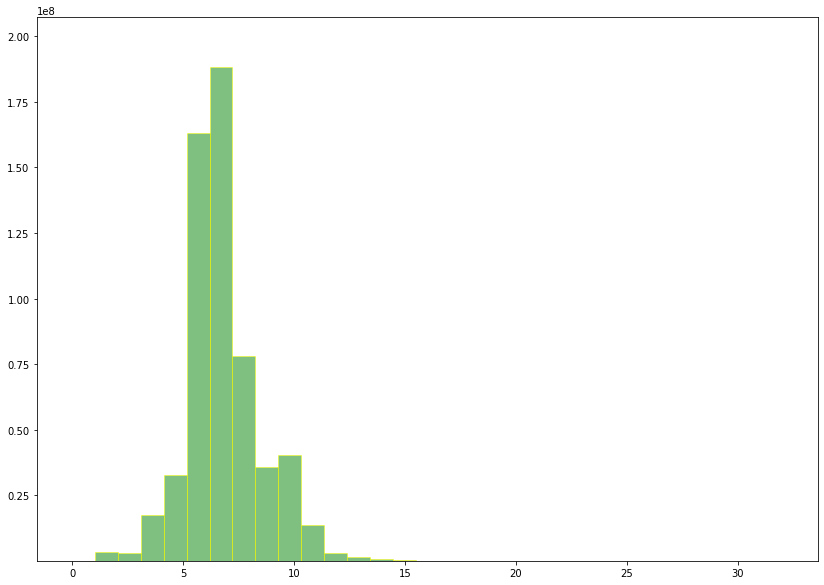

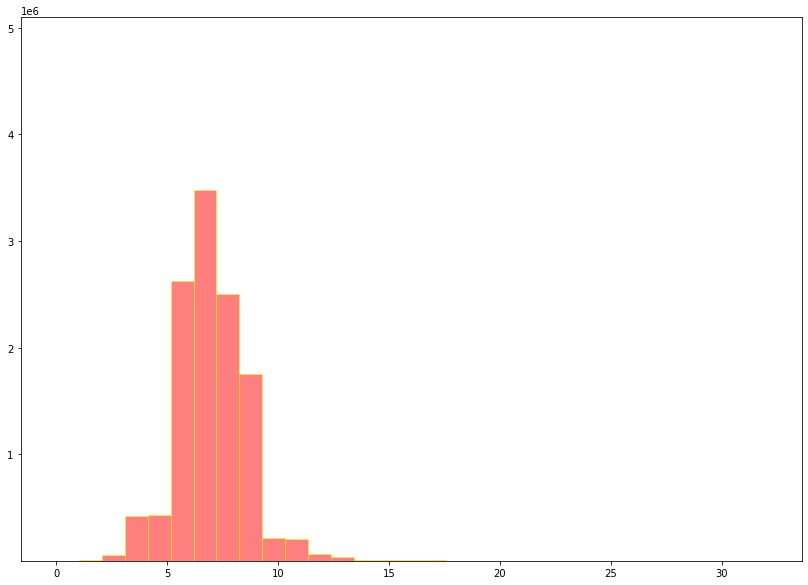

In [15]:
plot(tot,'memtot.html',"green")
plot(live,'memlive.html',"red")